**Data Source:** https://data.lacity.org/A-Safe-City/Crime-Data-from-2010-to-2019/63jg-8b9z

**Crm Cd**

Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious.

Hence I'll be creating a 'Crime_Weighted' variable which gives higher weight to crimes of lower class numbers

In [1]:
# Basic Python
import pandas as pd
pd.set_option('display.max_columns', 50)

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Crime_Data_2019_Neighborhoods_v3.csv')
df.rename(columns={'Crm Cd 1':'Crime_Code'}, inplace=True)
df.dropna(axis=0, subset=['Neighborhood', 'Crime_Code'], inplace=True)
df.drop(['Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

In [3]:
df['Crime_Weighted'] = 100/df['Crime_Code']

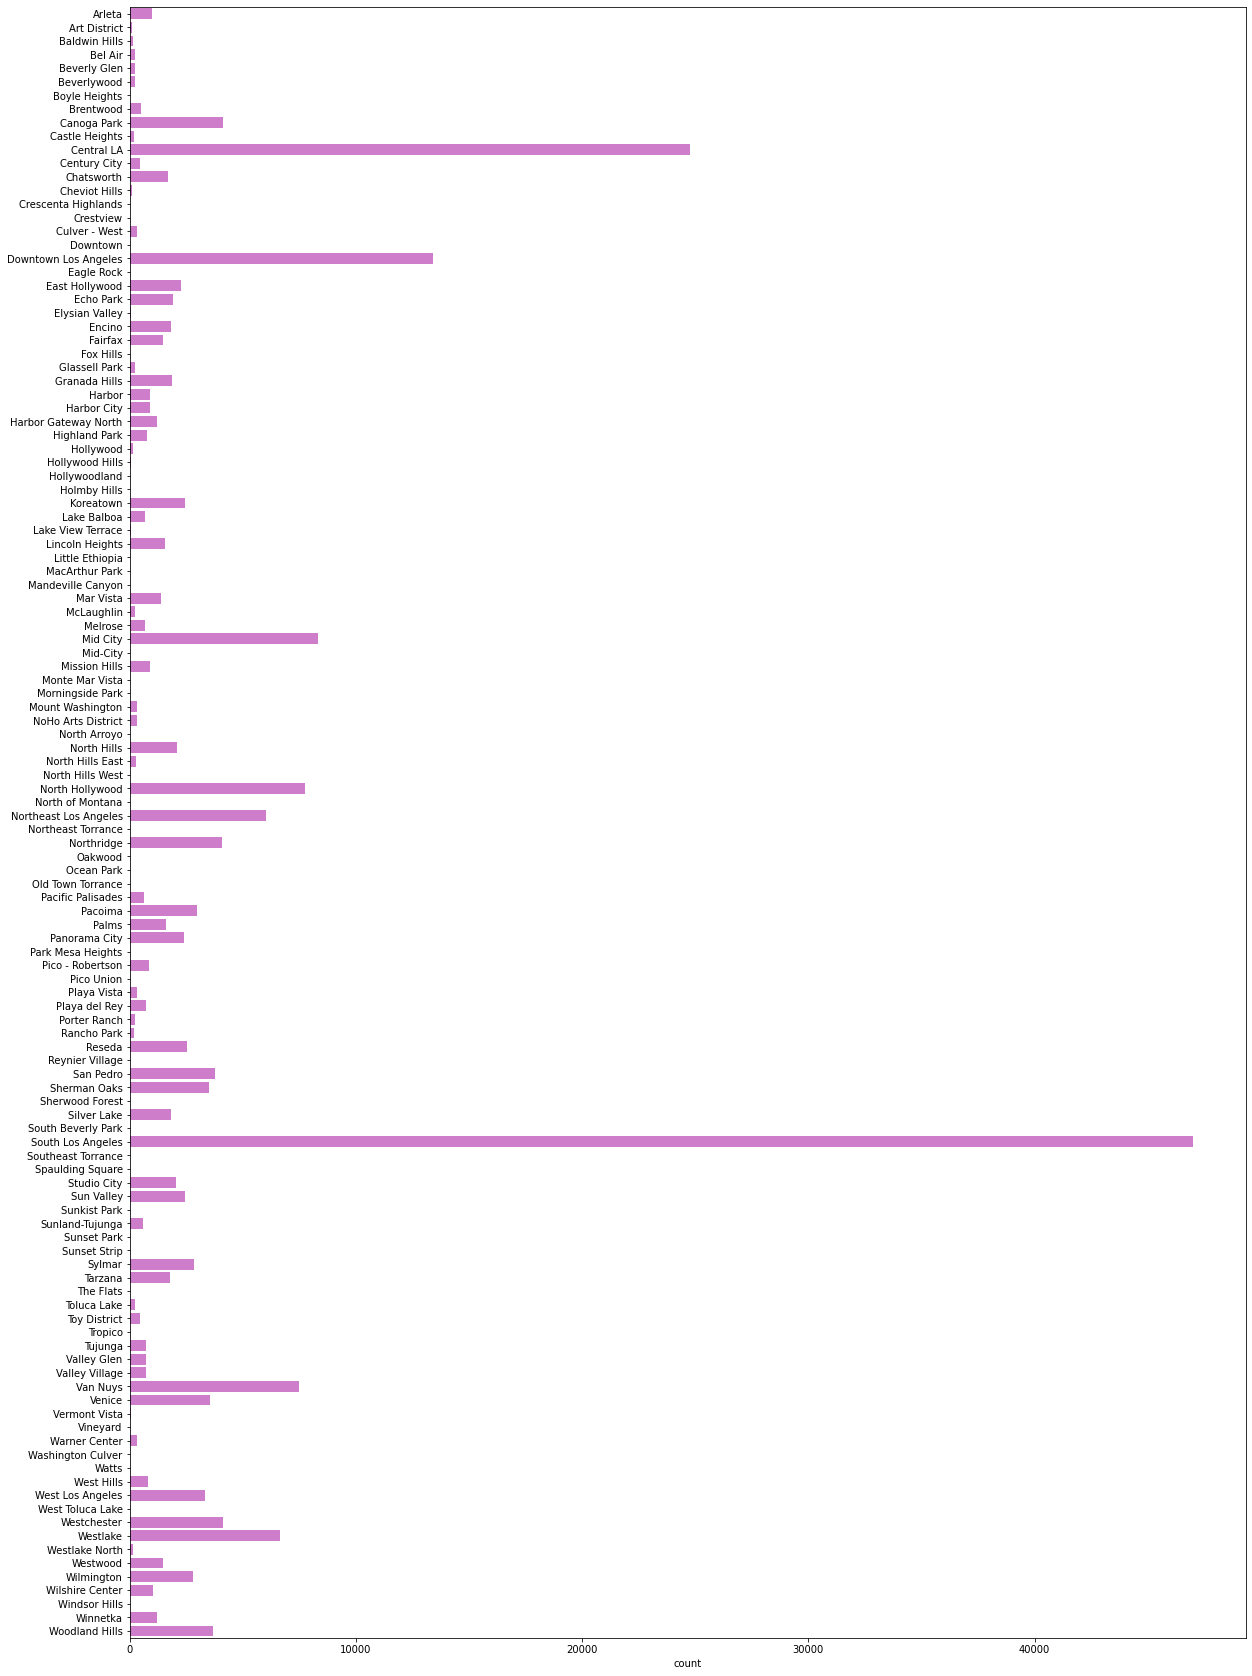

In [4]:
fig, ax = plt.subplots(figsize=(20, 30))
fig = sns.countplot(y=sorted(df['Neighborhood']), color='orchid')

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Crime_Weighted_Norm'] = scaler.fit_transform(df['Crime_Weighted'].values.reshape(-1, 1))
plot_data = df.groupby('Neighborhood')['Crime_Weighted_Norm'].mean()

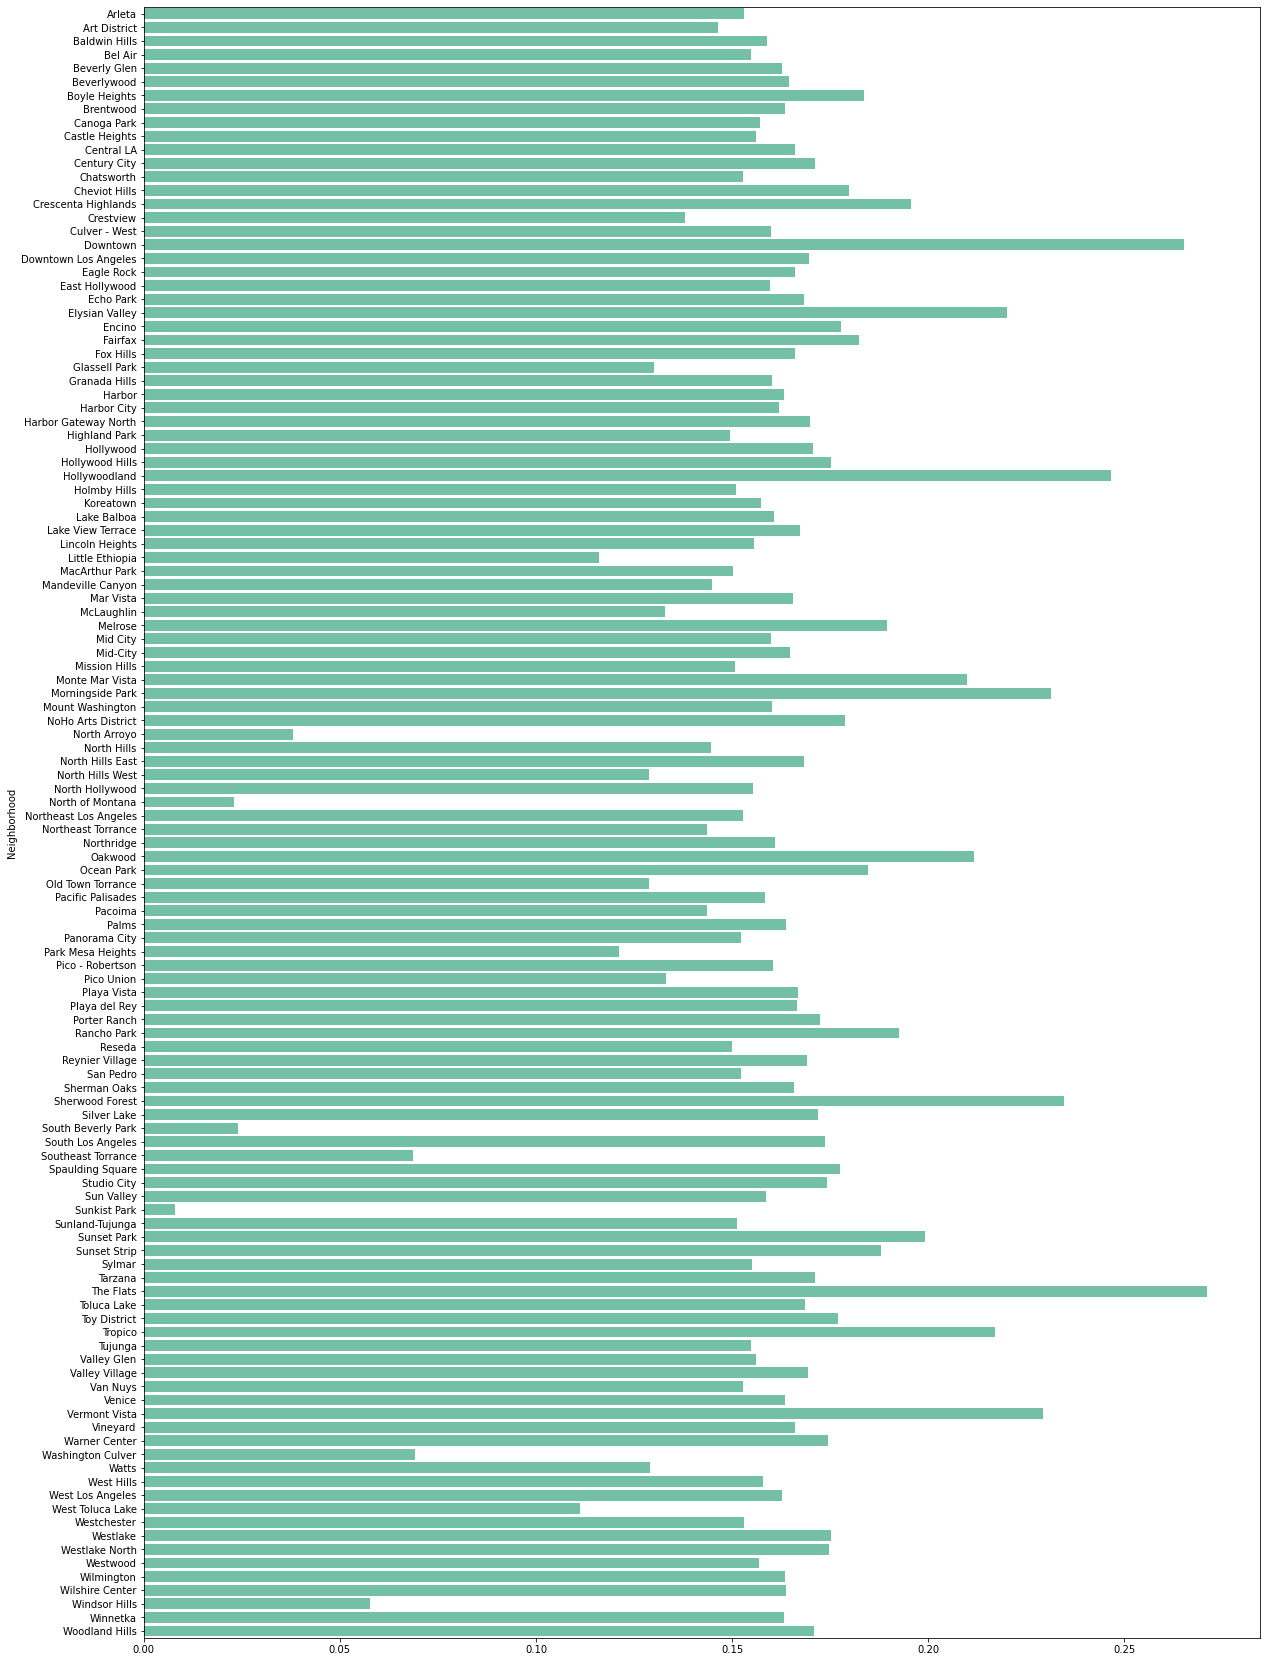

In [6]:
fig, ax = plt.subplots(figsize=(20, 30))
fig = sns.barplot(x=plot_data.values, y=plot_data.index, color='mediumaquamarine')

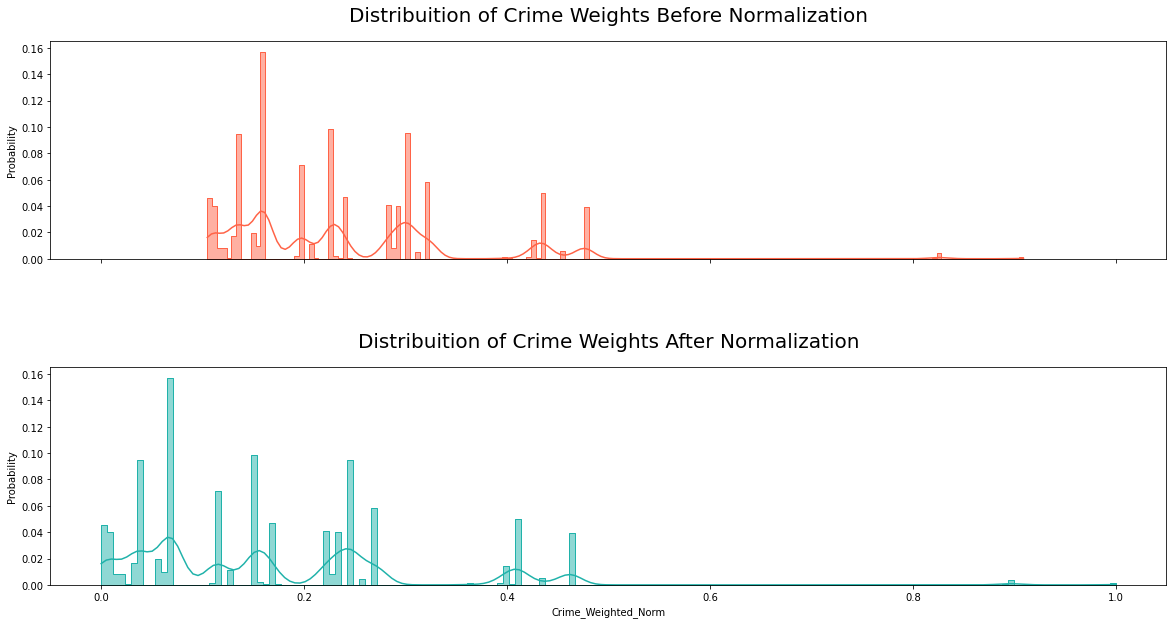

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 10), sharex=True, sharey=True)
fig.subplots_adjust(hspace = 0.5)

sns.histplot(df['Crime_Weighted'], stat='probability', element='step', kde=True, color='tomato', ax=ax[0])
#sns.histplot(df.groupby('Neighborhood')['Crime_Weighted'].mean(), stat='probability', element='step', kde=True, color='tomato', ax=ax[0])
ax[0].set_title('Distribuition of Crime Weights Before Normalization', fontsize=20, pad=20)

sns.histplot(df['Crime_Weighted_Norm'], stat='probability', element='step', kde=True, color='lightseagreen', ax=ax[1])
ax[1].set_title('Distribuition of Crime Weights After Normalization', fontsize=20, pad=20)

plt.show()

In [8]:
df

,DR_NO,DATE OCC,Crime_Code,LAT,LON,Neighborhood,Crime_Weighted,Crime_Weighted_Norm
0,191907191,2019-03-08,510.0,34.2991,-118.4211,Sylmar,0.196078,0.113707
1,190125334,2019-10-17,330.0,34.0363,-118.2314,Downtown Los Angeles,0.303030,0.246651
2,191920961,2019-12-22,510.0,34.2283,-118.4611,North Hills East,0.196078,0.113707
3,190604395,2019-01-09,510.0,34.0944,-118.3180,Central LA,0.196078,0.113707
4,191310615,2019-04-30,510.0,33.9930,-118.2411,South Los Angeles,0.196078,0.113707
...,...,...,...,...,...,...,...,...
216083,190608903,2019-03-28,648.0,34.0962,-118.3490,Central LA,0.154321,0.061801
216084,190715222,2019-08-14,331.0,34.0871,-118.3732,Melrose,0.302115,0.245513
216085,192004409,2019-01-06,930.0,34.0637,-118.2870,Wilshire Center,0.107527,0.003635
216086,191716777,2019-10-16,420.0,34.2266,-118.5085,Northridge,0.238095,0.165935


In [9]:
df.to_csv('Crime_Data_2019_Neighborhoods_v4.csv', index=False)

**Creating JSONs Aggregated by Neighborhood**

In [10]:
import json

In [11]:
# Tally Criems per Neighborhood
crimes_per_neighborhood = df.groupby('Neighborhood').size()
crimes_per_neighborhood

Neighborhood
Arleta              994
Art District        114
Baldwin Hills       142
Bel Air             250
Beverly Glen        216
                   ... 
Wilmington         2797
Wilshire Center    1009
Windsor Hills         1
Winnetka           1226
Woodland Hills     3697
Length: 120, dtype: int64

In [12]:
# Convert to JSON and save
json_crimes_per_neighborhood = crimes_per_neighborhood.to_dict()

with open('crimes_per_neighborhood.json', 'w') as f:
    json.dump(json_crimes_per_neighborhood, f)

In [13]:
# Average Crime_Weighted_Norm per Neighborhood
crime_score_per_neighborhood = df.groupby('Neighborhood')['Crime_Weighted_Norm'].mean()
crime_score_per_neighborhood

Neighborhood
Arleta             0.152963
Art District       0.146440
Baldwin Hills      0.158982
Bel Air            0.154696
Beverly Glen       0.162599
                     ...   
Wilmington         0.163433
Wilshire Center    0.163769
Windsor Hills      0.057745
Winnetka           0.163329
Woodland Hills     0.170938
Name: Crime_Weighted_Norm, Length: 120, dtype: float64

In [14]:
# Convert to JSON and save
json_crime_score_per_neighborhood = crime_score_per_neighborhood.to_dict()

with open('crime_score_per_neighborhood.json', 'w') as f:
    json.dump(json_crime_score_per_neighborhood, f)